## Imports and reading demographics data file

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

sns.set_context("poster")

#read file from EDA
demographics2 = pd.read_csv('demographics2.csv')

## Drop the country names, scale data

In [194]:
from sklearn.preprocessing import MinMaxScaler


# copy your original data frame, which includes all variables
data_cluster = demographics2.copy()

# drop Country column
data_cluster.drop( "Country", inplace=True, axis=1)

# scale data
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(data_cluster)
print(data_cluster.head())
data_cluster.literacy_avg.describe()
Xdf = pd.DataFrame(X_train_minmax)
Xdf.columns = data_cluster.columns
print(Xdf.head())

   Unnamed: 0  badteeth  literacy_avg  water_avg      GDP_avg   sugar_avg  \
0           0      3.02     98.712978       88.0  1011.752695   49.504318   
1           1      2.30     59.752193       90.4  1625.140989   67.995227   
2           2      1.70     67.405416       38.4   318.739949   33.129091   
3           3      0.70     98.950000       98.0  7874.822798   98.443182   
4           4      2.70     98.737052       98.0  1196.023043  100.526923   

   health_avg  Low_BMI  Adolescent birth rate  Tobacco_Use  Smokers  
0   24.751387      1.9                   19.7         11.8     11.5  
1   50.424490      6.2                   12.4          9.0      5.7  
2   12.275108     10.3                  190.9         19.8      2.3  
3  259.996606      3.5                   66.8         11.9      7.4  
4   64.079201      2.5                   21.6         26.9     26.5  
   Unnamed: 0  badteeth  literacy_avg  water_avg   GDP_avg  sugar_avg  \
0    0.000000  0.485714      0.989593   0.85

## Showing before and after scaling. It does not change distribution, only y-axis

Text(0.5,1,'Scaled GDP')

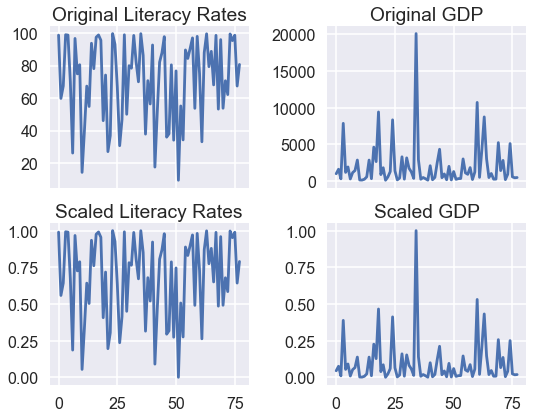

In [195]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(8, 6))
fig.tight_layout()
ax1.plot(data_cluster.literacy_avg)
ax1.set_title("Original Literacy Rates")
ax2.plot(data_cluster.GDP_avg)
ax2.set_title("Original GDP")
ax3.plot(Xdf.literacy_avg)
ax3.set_title("Scaled Literacy Rates")
ax4.plot(Xdf.GDP_avg)
ax4.set_title("Scaled GDP")

Text(0.5,1,'Scaled GDP')

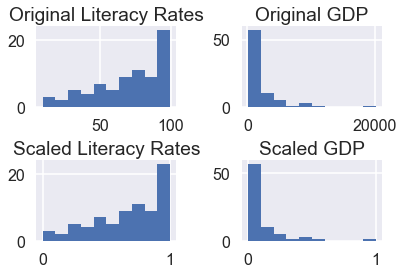

In [196]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.tight_layout()
ax1.hist(data_cluster.literacy_avg)
ax1.set_title("Original Literacy Rates")
ax2.hist(data_cluster.GDP_avg)
ax2.set_title("Original GDP")
ax3.hist(Xdf.literacy_avg)
ax3.set_title("Scaled Literacy Rates")
ax4.hist(Xdf.GDP_avg)
ax4.set_title("Scaled GDP")

## Create a dataframe of Country names, number of bad teeth and K-means cluster labels

In [197]:
from sklearn.cluster import KMeans

# perform KMeans clustering
clustered_data = KMeans(n_clusters=4, random_state=0).fit_predict(X_train_minmax)

# add cluster labels to df
df_cluster = pd.DataFrame(clustered_data)
demo_cluster = pd.concat([data_cluster, df_cluster], axis=1)
demo_cluster.rename(columns={"0": "cluster", "Unnamed: 0" : "Country"}, inplace=True)

countries = list(demographics2['Country'])
teeth =list(demographics2['badteeth'])

df = pd.DataFrame({'labels' : clustered_data, 'Countries' : countries, 'badteeth' : teeth})

print(df.head())

             Countries  badteeth  labels
0              Albania      3.02       3
1              Algeria      2.30       3
2               Angola      1.70       1
3  Antigua and Barbuda      0.70       3
4              Belarus      2.70       2


## Graph K-means inertias to decide number of clusters

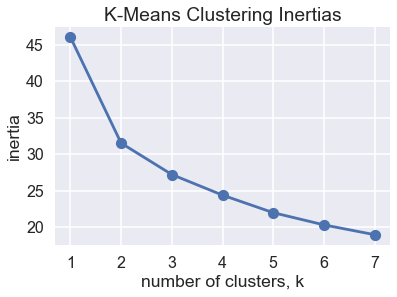

In [198]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train_minmax)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('K-Means Clustering Inertias')
plt.show()

In [199]:
# Find the inertia for four clusters
fourclusters = KMeans(n_clusters=4, random_state=0).fit(X_train_minmax)
print(fourclusters.inertia_)

24.5432657016


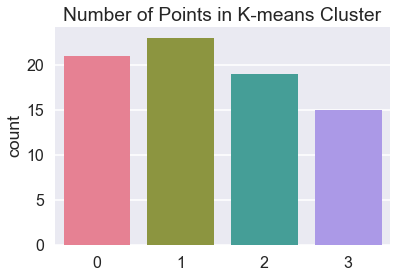

In [200]:
# Show number of countries in each cluster for KNN
plt.figure()
cluster_size = df.groupby(clustered_data).size()

sns.countplot(clustered_data, palette='husl').set_title('Number of Points in K-means Cluster')

plt.show()

## Create a complete hierarchical clustering dendrogram

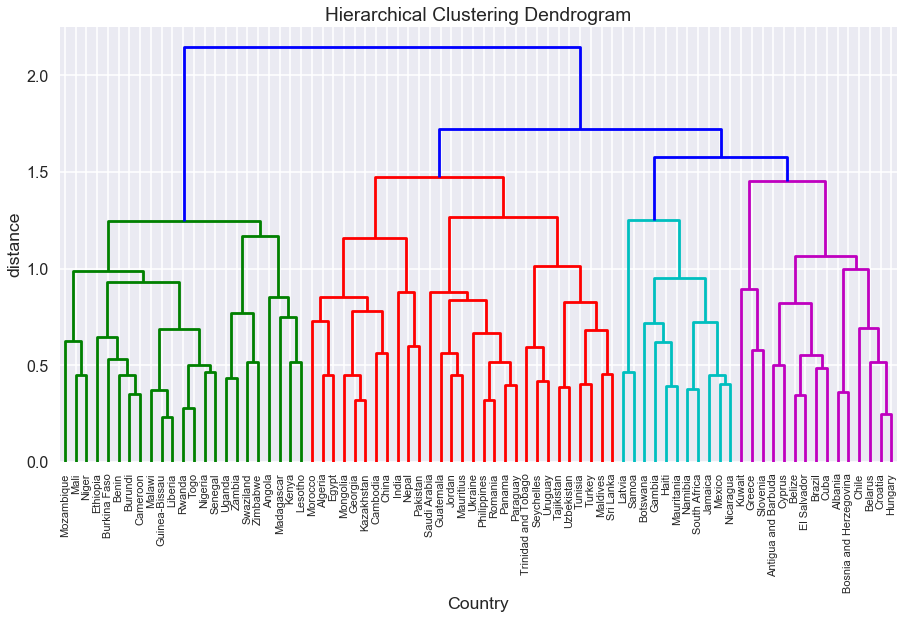

In [201]:
#Perform hierarchical clustering
mergings = linkage(X_train_minmax, method='complete')

# Plot on a Dendrogram
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('distance')
dendrogram(mergings,
           labels=countries,
           leaf_rotation=90,
           leaf_font_size=11,
)


plt.show()

In [202]:
#Gather the cluster labels from hierarchical clustering
flabels = fcluster(mergings, 1.5, criterion='distance')
print(flabels)

[4 2 1 4 4 4 1 4 3 4 1 1 2 1 4 2 4 4 4 2 4 1 3 2 4 2 1 3 4 2 3 2 2 1 4 3 1
 1 1 1 2 1 3 2 3 2 2 1 3 2 3 1 1 2 2 2 2 2 1 3 2 1 2 4 3 2 1 2 1 2 2 2 1 2
 2 2 1 1]


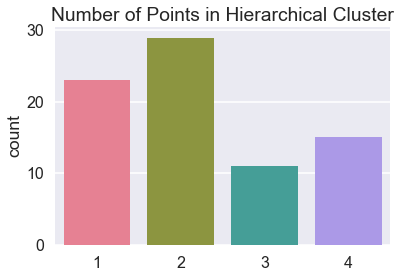

In [203]:
#Show number of countries in each cluster for Hierarchical
plt.figure()

cluster_size = df.groupby(flabels).size()

sns.countplot(flabels, palette='husl').set_title('Number of Points in Hierarchical Cluster')

plt.show()

## Clean demographics dataframe

In [204]:
demograph= demographics2.loc[:, 'Country':'Smokers'].astype(str)
demograph.Country = demograph.Country.astype(str)
demograph.Country = demograph.Country.str.encode('utf-8')

print(demograph.head())

                  Country badteeth   literacy_avg water_avg        GDP_avg  \
0              b'Albania'     3.02  98.7129780777      88.0  1011.75269494   
1              b'Algeria'      2.3  59.7521926392      90.4   1625.1409887   
2               b'Angola'      1.7  67.4054160383      38.4  318.739948801   
3  b'Antigua and Barbuda'      0.7          98.95      98.0  7874.82279781   
4              b'Belarus'      2.7  98.7370522886      98.0  1196.02304297   

       sugar_avg     health_avg Low_BMI Adolescent birth rate Tobacco_Use  \
0  49.5043181818  24.7513865611     1.9                  19.7        11.8   
1  67.9952272727  50.4244901922     6.2                  12.4         9.0   
2  33.1290909091  12.2751083489    10.3                 190.9        19.8   
3  98.4431818182  259.996606047     3.5                  66.8        11.9   
4  100.526923077  64.0792013689     2.5                  21.6        26.9   

  Smokers  
0    11.5  
1     5.7  
2     2.3  
3     7.4  
4    26.

## Read and clean Country and Regions dataframe

In [205]:
#Read and clean country and regions
world = pd.read_excel('countries of the world.xls', header = 3).loc[1:, 'Country':'Region'].astype(str)
world.Country = world.Country.astype(str)
world.Country = world.Country.str[:-1]
world.Country = world.Country.str.replace('&','and')
world.Country = world.Country.str.encode('utf-8')

print(world.head())

             Country                               Region
1     b'Afghanistan'        ASIA (EX. NEAR EAST)         
2         b'Albania'  EASTERN EUROPE                     
3         b'Algeria'  NORTHERN AFRICA                    
4  b'American Samoa'  OCEANIA                            
5         b'Andorra'  WESTERN EUROPE                     


## Merge regions with demographics

In [224]:
regionscheck = pd.merge(demograph, world, on='Country', how='left')
regionscheck.Region = regionscheck.Region.fillna('OTHER     ')

for index, region in enumerate(regionscheck['Region']):
    regionscheck['Region'][index] = region.strip()
print(regionscheck.tail())

          Country badteeth   literacy_avg water_avg        GDP_avg  \
73     b'Ukraine'      4.4  99.4304104118      96.0  937.359070253   
74     b'Uruguay'      2.5  95.3409530104      97.0   5120.7236379   
75  b'Uzbekistan'      1.4  98.6425834702      87.0  582.819432502   
76      b'Zambia'      2.3  67.3830911833      50.2  462.377137396   
77    b'Zimbabwe'      1.3  80.6533730447      70.2  494.133681526   

        sugar_avg     health_avg Low_BMI Adolescent birth rate Tobacco_Use  \
73  114.437692308    29.22919154     2.8                  27.2        19.3   
74  94.0218181818  333.144906933     1.7                  63.5        10.8   
75  30.7723076923  15.6102997589     3.3                  29.5         2.2   
76  36.4295454545  13.0646918822     7.2                 145.0        25.6   
77  57.9709090909  27.3437220043     9.8                 120.0        12.0   

   Smokers               Region  
73    16.6  C.W. OF IND. STATES  
74    10.5  LATIN AMER. & CARIB  
75     1

## Create table of regions vs. K-means cluster labels

In [207]:
#Compare number of countries in specific regions vs. cluster label for KNN

df['Region'] = regionscheck['Region']

Kmeans = pd.crosstab(df['labels'], df['Region'])
display(Kmeans)

Region,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,OCEANIA,OTHER,SUB-SAHARAN AFRICA,WESTERN EUROPE
labels,,,,,,,,,,,
0,4,0,2,1,4,1,2,0,0,7,0
1,2,0,0,0,1,0,0,0,1,19,0
2,0,1,2,3,5,4,0,1,0,2,1
3,3,0,2,2,5,0,2,0,0,1,0


## Create a heatmap showing regions vs. K-means cluster labels

Text(0.5,1,'# of countries in region per K-Means cluster')

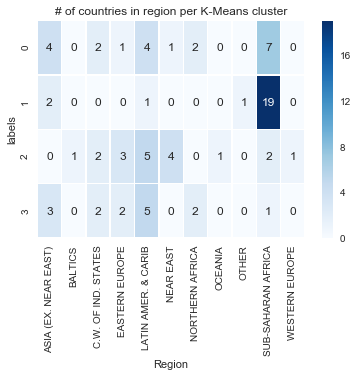

In [208]:
sns.set(font_scale = 1)
sns.heatmap(Kmeans, annot=True, cmap='Blues', linewidths=0.5).set_title('# of countries in region per K-Means cluster')

## Create table of regions vs. cluster label for Hierarchical

In [209]:
#Compare number of countries in specific regions vs. cluster label for Hierarchical

df['flabels'] = flabels
hier = pd.crosstab(df['flabels'], df['Region'])
display(hier)

Region,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,OCEANIA,OTHER,SUB-SAHARAN AFRICA,WESTERN EUROPE
flabels,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,23,0
2,9,0,5,1,5,3,4,0,0,2,0
3,0,1,0,0,4,0,0,1,1,4,0
4,0,0,1,5,6,2,0,0,0,0,1


## Create graph of regions vs. cluster label for Hierarchical

Text(0.5,1,'# of countries in region per hierarchical cluster')

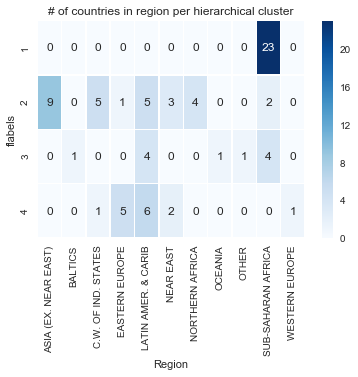

In [210]:
sns.heatmap(hier, annot=True, cmap='Blues', linewidths=0.5).set_title('# of countries in region per hierarchical cluster')

## Compare number of bad teeth vs. K-means Cluster labels

binnedbadteeth,<1,1-1.9,2-2.9,3-3.9,4-4.9,5+
labels,,,,,,
0,6,8,5,2,0,0
1,13,5,5,0,0,0
2,2,4,5,5,2,1
3,5,3,4,1,1,1


badteeth                                                 
          count      mean       std  min    25%  50%    75%  max
labels                                                          
0          21.0  1.815714  0.938715  0.4  1.200  1.4  2.500  3.8
1          23.0  1.250435  0.846627  0.3  0.575  1.0  1.625  3.1
2          19.0  2.817895  1.286889  1.1  1.900  2.6  3.400  5.9
3          15.0  2.271333  1.477521  0.5  1.105  2.1  2.910  5.2

Text(0.5,1,'# of bad teeth  per k-means cluster')

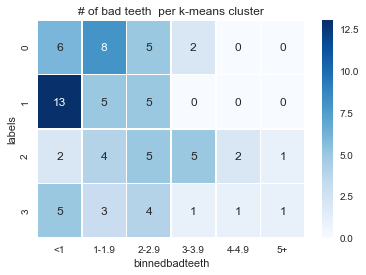

In [211]:
#Compare number of bad teeth rounded to nearest integer vs. cluster label for KNN

df['binnedbadteeth']= pd.cut(df.badteeth, 6, labels=["<1", "1-1.9", "2-2.9", "3-3.9", "4-4.9", "5+"])

Kmeansteeth = pd.crosstab(df['labels'], df['binnedbadteeth'])
display(Kmeansteeth)

# Compare the distributions of badteeth between clusters

kmeanstable = pd.DataFrame({"labels" : df['labels'], "badteeth" : df['badteeth']})
display(kmeanstable.groupby('labels').describe())

sns.heatmap(Kmeansteeth, annot=True, cmap='Blues', linewidths=0.5).set_title('# of bad teeth  per k-means cluster')


## Create a box plot with number of bad teeth vs. K-means cluster labels with cluster sizes

[ 1.4  1.   2.6  2.1]


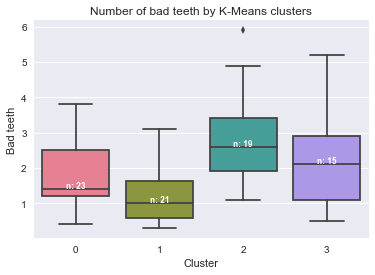

In [212]:
# Graph distributions of badteeth between clusters for KNN

ax = sns.boxplot(x="labels", y="badteeth", data=kmeanstable, palette='husl')
plt.title("Number of bad teeth by K-Means clusters")
plt.ylabel("Bad teeth")
plt.xlabel("Cluster")

# Calculate number of obs per group & median to position labels
medians = kmeanstable.groupby(['labels'])['badteeth'].median().values
nobs = df['labels'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
print(medians)

## Compare number of bad teeth vs. hierarchical Cluster labels

binnedbadteeth,<1,1-1.9,2-2.9,3-3.9,4-4.9,5+
flabels,,,,,,
1,13,6,4,0,0,0
2,5,8,8,4,2,2
3,5,3,2,1,0,0
4,3,3,5,3,1,0


badteeth                                                 
           count      mean       std  min    25%  50%    75%  max
flabels                                                          
1           23.0  1.213478  0.813548  0.3  0.600  1.0  1.525  3.1
2           29.0  2.518276  1.391320  0.5  1.400  2.3  3.300  5.9
3           11.0  1.654545  0.875344  0.5  1.075  1.5  2.150  3.4
4           15.0  2.357333  1.181545  0.6  1.400  2.6  3.160  4.8

Text(0.5,1,'# of bad teeth  per hierarchical cluster')

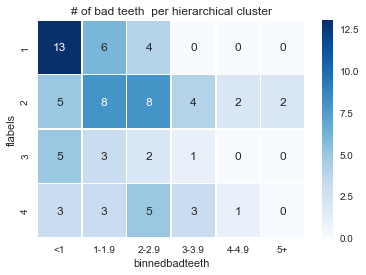

In [213]:
#Compare number of bad teeth binned to nearest integer vs. cluster label for Hierarchical

hier = pd.crosstab(df['flabels'], df['binnedbadteeth'])
display(hier)

# Compare the distributions of badteeth between clusters

hiertable = pd.DataFrame({"flabels" : df['flabels'], "badteeth" : df['badteeth']})
display(hiertable.groupby('flabels').describe())

sns.heatmap(hier, annot=True, cmap='Blues', linewidths=0.5).set_title('# of bad teeth  per hierarchical cluster')

## Graph distributions of badteeth between clusters for hierarchical clustering

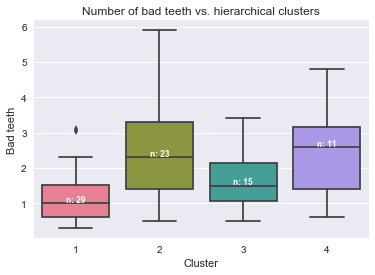

In [214]:
# Graph distributions of badteeth between clusters for hierarchical clustering

ax = sns.boxplot(x="flabels", y="badteeth", data=hiertable, palette='husl')
plt.title("Number of bad teeth vs. hierarchical clusters")
plt.ylabel("Bad teeth")
plt.xlabel("Cluster")

medians = hiertable.groupby(['flabels'])['badteeth'].median().values
nobs = df['flabels'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='w', weight='semibold')



## Create and fit PCA, get explained variance ratio

In [215]:
# create and fit pca
pca = PCA(n_components=10)
pca.fit(X_train_minmax)

# print results  
print(pca.explained_variance_ratio_.cumsum())

[ 0.42901599  0.57717829  0.68602623  0.75888298  0.82288619  0.88242659
  0.93121279  0.95992175  0.97898778  0.99261166]


### So this means that using 2 components, I would retain only 57.7% of the variance

## Create table of PCA and Kmeans cluster labels

In [216]:
# Create table of PCA and Kmeans cluster labels
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_minmax)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['labels']]], axis = 1)
print(finalDf.tail())

    principal component 1  principal component 2  labels
73              -0.604278               0.448725       2
74              -0.475920               0.496369       2
75               0.003527               0.541613       0
76               0.423736               0.460940       0
77               0.273890               0.531976       0


## Graph Kmeans PCA

Text(0.5,1,'2D PCA for K-Means Clustering')

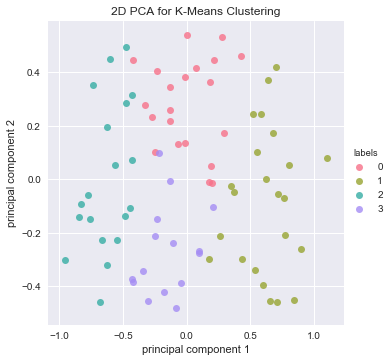

In [217]:
# Plot PCA for kmeans
sns.lmplot("principal component 1", "principal component 2", finalDf, hue="labels", fit_reg=False, palette='husl')
plt.title("2D PCA for K-Means Clustering")

## Create table of PCA and Hierarchical cluster labels

In [218]:
# Create table of PCA and Hierarchical cluster labels
pca = PCA(n_components=2)
fprincipalComponents = pca.fit_transform(X_train_minmax)
fprincipalDf = pd.DataFrame(data = fprincipalComponents
             , columns = ['principal component 1', 'principal component 2'])

ffinalDf = pd.concat([fprincipalDf, df[['flabels']]], axis = 1)
print(ffinalDf.tail())

    principal component 1  principal component 2  flabels
73              -0.604278               0.448725        2
74              -0.475920               0.496369        2
75               0.003527               0.541613        2
76               0.423736               0.460940        1
77               0.273890               0.531976        1


## Graph Hierarchical PCA

Text(0.5,1,'2D PCA for hierarchical Clustering')

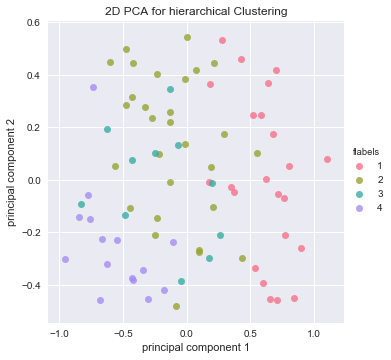

In [219]:
# Plot PCA for hierarchical
sns.lmplot("principal component 1", "principal component 2", ffinalDf, hue="flabels", fit_reg=False, palette='husl')
plt.title("2D PCA for hierarchical Clustering")

## 5 Countries with the lowest number of bad teeth

In [220]:
demographics2.sort_values('badteeth').head()

,Unnamed: 0,Country,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg,Low_BMI,Adolescent birth rate,Tobacco_Use,Smokers
58,58,Rwanda,0.30,53.661836,48.4,222.491104,2.677727,4.986949,7.1,45.0,11.5,1.8
68,68,Togo,0.30,53.177599,47.8,277.809494,12.392273,4.767702,8.7,85.0,8.4,4.8
36,36,Lesotho,0.40,86.254435,67.0,263.456704,43.652045,15.197218,10.2,94.0,24.8,10.1
37,37,Liberia,0.40,37.783813,62.8,494.696872,12.143182,2.248665,8.7,147.0,13.6,2.1
52,52,Nigeria,0.46,55.109967,49.2,346.074925,16.751364,8.628378,13.5,122.0,15.4,3.5


## 5 Countries with the highest number of bad teeth

In [221]:
df.sort_values('badteeth').tail(5)

,Countries,badteeth,labels,Region,flabels,binnedbadteeth
73,Ukraine,4.4,2,C.W. OF IND. STATES,2,4-4.9
7,Bosnia and Herzegovina,4.8,3,EASTERN EUROPE,4,4-4.9
43,Mauritius,4.9,2,SUB-SAHARAN AFRICA,2,4-4.9
25,Guatemala,5.2,3,LATIN AMER. & CARIB,2,5+
60,Saudi Arabia,5.9,2,NEAR EAST,2,5+


## Compare number of bad teeth for countries by region

badteeth                                                \
                        count      mean       std   min    25%   50%    75%   
region                                                                        
ASIA (EX. NEAR EAST)      9.0  1.938889  1.035935  0.50  1.380  1.90  2.300   
BALTICS                   1.0  3.400000       NaN  3.40  3.400  3.40  3.400   
C.W. OF IND. STATES       6.0  2.366667  1.150072  1.20  1.575  2.25  2.625   
EASTERN EUROPE            6.0  3.203333  0.981054  1.80  2.855  3.16  3.450   
LATIN AMER. & CARIB      15.0  2.083333  1.414171  0.60  0.900  1.50  3.100   
NEAR EAST                 5.0  3.128000  1.741241  1.14  2.600  2.70  3.300   
NORTHERN AFRICA           4.0  1.820000  0.676461  1.18  1.270  1.80  2.350   
OCEANIA                   1.0  2.500000       NaN  2.50  2.500  2.50  2.500   
OTHER                     1.0  2.300000       NaN  2.30  2.300  2.30  2.300   
SUB-SAHARAN AFRICA       29.0  1.346897  1.015449  0.30  0.700  1.20  1.550   
WESTERN EUROPE            1.0  2.200000       NaN  2.20  2.200  2.20  2.200   

                            
                       max  
region                      
ASIA (EX. NEAR EAST)  3.94  
BALTICS               3.40  
C.W. OF IND. STATES   4.40  
EASTERN EUROPE        4.80  
LATIN AMER. & CARIB   5.20  
NEAR EAST             5.90  
NORTHERN AFRICA       2.50  
OCEANIA               2.50  
OTHER                 2.30  
SUB-SAHARAN AFRICA    4.90  
WESTERN EUROPE        2.20

binnedbadteeth,<1,1-1.9,2-2.9,3-3.9,4-4.9,5+
Region,,,,,,
ASIA (EX. NEAR EAST),2,4,2,1,0,0
BALTICS,0,0,0,1,0,0
C.W. OF IND. STATES,1,2,2,0,1,0
EASTERN EUROPE,0,1,2,2,1,0
LATIN AMER. & CARIB,5,4,2,3,0,1
NEAR EAST,1,0,2,1,0,1
NORTHERN AFRICA,1,1,2,0,0,0
OCEANIA,0,0,1,0,0,0
OTHER,0,0,1,0,0,0


Text(0.5,1,'# of bad teeth  per region')

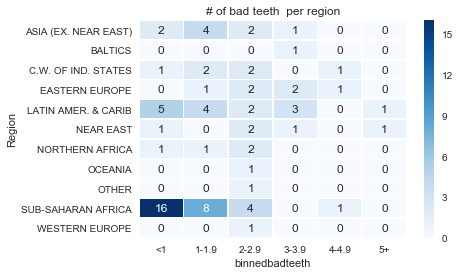

In [222]:
teethregion = pd.DataFrame({"region" : df['Region'], "badteeth" : df['badteeth']})
display(teethregion.groupby('region').describe())


rt = pd.crosstab(df['Region'], df['binnedbadteeth'])
display(rt)

sns.heatmap(rt, annot=True, cmap='Blues', linewidths=0.5).set_title('# of bad teeth  per region')